<a href="https://colab.research.google.com/github/GezhinOleg/Pay_Stat_L4/blob/main/corellation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Домашнее задание
### 1. Задача - ответить на вопрос есть ли связь между жёсткостью воды и средней годовой смертностью?
    a. Построить точечный график
    b. Рассчитать коэффициенты корреляции Пирсона и Спирмена
    c. Построить модель линейной регрессии
    d. Рассчитать коэффициент детерминации
    e. Вывести график остатков
### 2. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?
    a. Разделить данные на 2 группы
    b. Повторить аналогичные шаги из пункта 1 для каждой группы по отдельности

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_csv('water.csv').set_index('town')
data.drop('Unnamed: 0', axis=1, inplace=True)
data.head()

,location,mortality,hardness
town,,,
Bath,South,1247,105
Birkenhead,North,1668,17
Birmingham,South,1466,5
Blackburn,North,1800,14
Blackpool,North,1609,18


<AxesSubplot:xlabel='mortality', ylabel='hardness'>

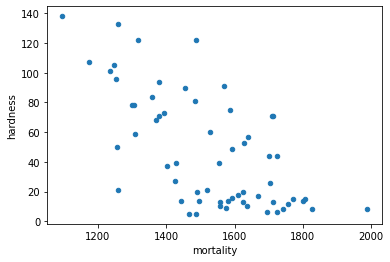

In [ ]:
data.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
data[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.654849
hardness,-0.654849,1.000000


In [ ]:
data[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.631665
hardness,-0.631665,1.000000


In [ ]:
data[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.453753
hardness,-0.453753,1.000000


## Регрессия

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
X = data[['hardness']]
y = data['mortality']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=20)

In [ ]:
X_train.shape

(30, 1)

In [ ]:
y_train.shape

(30,)

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [ ]:
model.coef_

array([-3.76840682])

In [ ]:
model.intercept_

1723.9477850486633

In [ ]:
y_pred = model.predict(X_test)
y_pred

array([1656.11646221, 1381.02276403, 1576.9799189 , 1264.20215248,
       1384.79117086, 1644.81124174, 1674.95849633, 1686.26371681,
       1456.39090052, 1467.69612099, 1674.95849633, 1705.10575093,
       1690.03212363, 1625.96920762, 1686.26371681, 1659.88486903,
       1524.22222336, 1693.80053045, 1264.20215248, 1671.19008951,
       1456.39090052, 1584.51673255, 1497.84337559, 1328.26506849,
       1362.18072991, 1671.19008951, 1501.61178241, 1535.52744383,
       1448.85408687, 1671.19008951, 1203.90764329])

In [ ]:
model.score(X_test, y_test)

0.2721902409837491

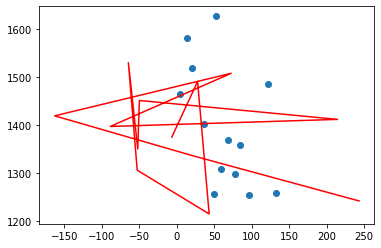

In [ ]:
plt.scatter(X_test, y_test)
plt.plot(y_test - y_pred, y_pred, c='r')

### 2 часть. Сохраняется ли аналогичная зависимость для северных и южных городов по отдельности?

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
data = pd.read_csv('water.csv').set_index('town')
data.drop('Unnamed: 0', axis=1, inplace=True)
data_south = data.drop(data[data.location == 'North'].index)
data_north = data.drop(data[data.location == 'South'].index)

<AxesSubplot:xlabel='mortality', ylabel='hardness'>

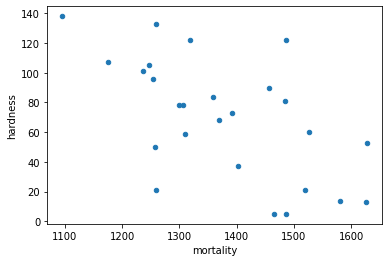

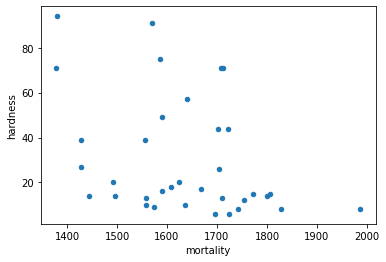

In [ ]:
data_south.plot(kind='scatter', x='mortality', y='hardness')
data_north.plot(kind='scatter', x='mortality', y='hardness')

In [ ]:
data_south[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.602153
hardness,-0.602153,1.000000


In [ ]:
data_north[['mortality', 'hardness']].corr()

,mortality,hardness
mortality,1.000000,-0.368598
hardness,-0.368598,1.000000


In [ ]:
data_south[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.595723
hardness,-0.595723,1.000000


In [ ]:
data_north[['mortality', 'hardness']].corr(method='spearman')

,mortality,hardness
mortality,1.000000,-0.404208
hardness,-0.404208,1.000000


In [ ]:
data_south[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.440315
hardness,-0.440315,1.000000


In [ ]:
data_north[['mortality', 'hardness']].corr(method='kendall')

,mortality,hardness
mortality,1.000000,-0.283058
hardness,-0.283058,1.000000


#### Северная группа

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

[-1.32322213]


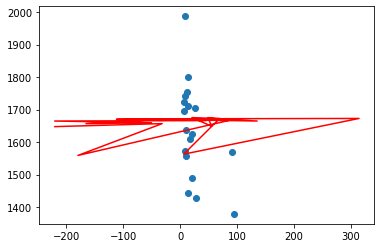

In [ ]:
X = data_north[['hardness']]
y = data_north['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)
model.fit(X_train, y_train)
print(model.coef_)
y_pred = model.predict(X_test)
model.score(X_test, y_test)
plt.scatter(X_test, y_test)
plt.plot(y_test - y_pred, y_pred, c='r')

### Южная группа

[-2.45947318]


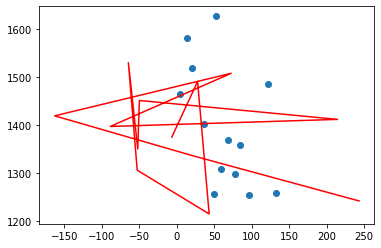

In [ ]:
X = data_south[['hardness']]
y = data_south['mortality']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.50, random_state=10)
model.fit(X_train, y_train)
print(model.coef_)
y_pred = model.predict(X_test)
model.score(X_test, y_test)
plt.scatter(X_test, y_test)
plt.plot(y_test - y_pred, y_pred, c='r')

Общая тенденция в городах южных и северных регионов, сохраняется. Хотя в северных регионах, она менее выражена.